<a href="https://colab.research.google.com/github/shivamsaxena17493/Machine-Learning-Practice/blob/master/EDA%20India%20Air%20Pollution%20Statewise%20Pollutants%20Based/INDIA_Air_Pollution_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Air Pollutants EDA Nationwide

In [0]:
# Importing libs

# for accessing directory to check file exists
import os
# for API call to provided endpoint URL
import urllib.request
# to interact with CSV file format
import csv
# for data manipulation
import pandas as pd 
# for API call
import requests
# for better displaying content
import pprint as pp
# for converting into datetime format and extract date from string
import datetime
# for loading the files in bunch
import glob

import numpy as np

# graphing
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from IPython.display import display, HTML

## Identified Web API - Air Pollution Emissions Realtime API by INDIA GOV

**API Chosen:** 

<b>Real time Air Quality Index from various location</b>

A single API that was chosen for this assignment was that provided by 

https://data.gov.in/

*API version - 2.1.0* 

<b>Government Open Data License - India</b>

Specifically, the  data API : 
https://data.gov.in/resources/real-time-air-quality-index-various-locations/

The API entitles the user to get 1050 records in single call to the API per day.

The API key I received which works here is 

In [0]:
data_id = '3b01bcb8-0b14-4abf-b6f2-c1bfd384ba69'
api_key = ''

## Data Collection from API for each day from 17 - 25 March 2019

The functions are written to allow multiple calls of the API as only limited data is available per call.

These function are commented throughout and are called below:

### Function getRawData for collecting raw data from datagov.in API

The following code retreives the raw data using the Function from the API 

In [0]:
def getRawData(api_endpoint_url):
  """ 
  function to call the API, retreive the raw JSON data, and write to a file
  
  parameters:
    api_endpoint_url - this is the url of the API from which data will be 
                       collected.
  """
  print("--------- Data Collection Started -----------")
  try:
    # function to collect air quality index data from API call
    # using get command, returns response JSON object
    result = requests.get(api_endpoint_url)
    # exploring response object and status code
    if result.status_code == 200:
      # in json format
      data = result.json()
      # extracting data rows from the response
      print("-------- Data Collection Completed ----------")
      return data
    else:
      print("Error while calling API for Air quality data collection")
  except Exception as err:
    print(err)

### Raw Data Collection

In [0]:
# setting up parameters for API call

# 1 time call for a day max data 1050
records_limit = '1050'
# availaible data formats json and xml
data_format = 'json' 

# creating API URL for call 
api_endpoint_url = 'https://api.data.gov.in/resource/' + data_id \
                                         + '?api-key=' + api_key \
                                         + '&format=' + data_format \
                                         + '&limit=' + records_limit


In [0]:
# Collecting raw json data from the API provided API endpoint URL created above
json_data = getRawData(api_endpoint_url)

--------- Data Collection Started -----------
-------- Data Collection Completed ----------


In [0]:
# displaying raw data collected from the API
pp.pprint(json_data)

{'active': '1',
 'catalog_uuid': 'a3e7afc6-b799-4ede-b143-8e074b27e0621',
 'count': 1010,
 'created': 1543320551,
 'created_date': '2018-11-27T17:39:11Z',
 'desc': 'Real time Air Quality Index from various location',
 'field': [{'id': 'id', 'name': 'id', 'type': 'double'},
           {'id': 'country', 'name': 'country', 'type': 'keyword'},
           {'id': 'state', 'name': 'state', 'type': 'keyword'},
           {'id': 'city', 'name': 'city', 'type': 'keyword'},
           {'id': 'station', 'name': 'station', 'type': 'keyword'},
           {'id': 'last_update', 'name': 'last_update', 'type': 'date'},
           {'id': 'pollutant_id', 'name': 'pollutant_id', 'type': 'keyword'},
           {'id': 'pollutant_min', 'name': 'pollutant_min', 'type': 'double'},
           {'id': 'pollutant_max', 'name': 'pollutant_max', 'type': 'double'},
           {'id': 'pollutant_avg', 'name': 'pollutant_avg', 'type': 'double'},
           {'id': 'pollutant_unit',
            'name': 'pollutant_unit',
  


## Parse the collected data, and store it in an appropriate file format

Collected  Raw JSON Data and parsing  to write CSV:

function writeRawDataToCSV writes it to a CSV file.

This data needs  cleaning and manipulation before it can be used.


In [0]:
def writeRawDataToCSV(json_data):
  """
    After validation json_data will get written in csv.
  """
  try:
    records = json_data['records']
    daily_records_csv = None
    num_records = len(records)
  
    print("{} rows returned from API".format(num_records))
    if num_records != 0:
      csv_headers = records[0].keys() # retrieving headers
      
      # to get the json_data modification date and time
      call_date,call_time = json_data['updated_date'].split('T')
      
      # opening file to write the records from API to CSV file
      file_name = 'airquality_data_' + call_date + '.csv'
      daily_records_csv = open(file_name, 'w', newline='')

      print("------ CSV Write Operation Started --------")
      csvwriter = csv.writer(daily_records_csv)
  
      # writing header rows
      csvwriter.writerow(csv_headers)

      # writing each record to csv file
      for row in records:
        csvwriter.writerow(row.values())
      print("----- CSV Write Operation Completed -------")
    else:
      print("No records returned from API for Air quality data collection")
  except Exception as err:
    print(err)
  finally:
    if daily_records_csv != None:
      daily_records_csv.close()
  return file_name

### Converting Raw data into CSV

In [0]:
# passing json raw data to be validated and written to CSV.
writeRawDataToCSV(json_data)

1010 rows returned from API
------ CSV Write Operation Started --------
----- CSV Write Operation Completed -------


'airquality_data_2019-03-26.csv'

**Generated Raw Data CSV**

In [0]:
pd.read_csv('airquality_data_2019-03-25.csv').head()

,id,country,state,city,station,last_update,pollutant_id,pollutant_min,pollutant_max,pollutant_avg,pollutant_unit
0,1,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",25-03-2019 10:00:00,PM2.5,10.0,45.0,28.0,NaN
1,2,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",25-03-2019 10:00:00,PM10,28.0,76.0,46.0,NaN
2,3,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",25-03-2019 10:00:00,NO2,7.0,19.0,12.0,NaN
3,4,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",25-03-2019 10:00:00,NH3,1.0,2.0,1.0,NaN
4,5,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",25-03-2019 10:00:00,SO2,5.0,27.0,17.0,NaN


## Load and represent the data. Pre-processing steps to clean/filter/combine the data

Parsing Raw Data:

The raw data returns 8 calls json data will get converted to 8 CSVs for each day

Raw data contains 12 columns.

**id ,	country, 	state, 	city, 	station, 	last_update, 	pollutant_id, 	pollutant_min, 	pollutant_max, 	pollutant_avg, 	pollutant_unit**

These 8 csv will be combined and to create single dataset.

Then combined dataset will be read as DataFrame object to apply data cleaning and filtering.


### 1. Adding column is_weekend for dates to dataset

In [0]:
# Function which takes date as an input and return True if it is a weekend and False if it is a weekday.
def isWeekend(date):
  day, month, year = (int(x) for x in date.split('-'))    
  ans = datetime.date(year, month, day)
  if ans.strftime("%A") == 'Saturday' or ans.strftime("%A") == 'Sunday': return True
  else: return False

### 2. Adding column is_festival  to dataset

In [0]:
# List of major festivals in India
festival_date_list = [
    '01-01-2019', # New Year's Eve
    '26-01-2019', # Republic day of India
    '04-03-2019', # Maha Shivratri
    '21-03-2019', # Holi
    '06-04-2019', # Gudi Padwa
    '17-04-2019', # Mahavir Jayanti
    '01-05-2019', # Maharashtra Day	
    '15-08-2019', # Independence Day
    '02-10-2019', # Gandhi Jayanti
    '08-10-2019', # Dussehra
    '27-10-2019', # Diwali
    '25-12-2019'  # Christmas
]


In [0]:
# Returns True or False if there is a Festival in the date.
def isFestival(date):
  if date in festival_date_list: return True
  else: return False

### 3. Removing Unnecessary Columns

4 columns removed because information provided were not relevant.


1.   **last_update**: Date time was of time when data was compiled.
2.   **country**: Only carries one value as it is data of single country INDIA.
3. **pollutant_unit**: All 6 pollutants concentration in Air is measured in unit parts per million(ppm), which doesn't add value to analysis
4. **id**: number of rows in dataset.




###  4.  Combining 8 csvs to single csv through dataframe and glob library

In [0]:
# Combine multiple csv's
def createFinalCSV():
  # initializing dataframe
  combined_df = pd.DataFrame()
  
  # reading air_quality prefix CSVs raw dataset files
  for daily_file in glob.glob("airquality_data_*.csv"):
    
    # loading each csvfile as dataframe
    daily_df = pd.read_csv(daily_file)
    
    # 
    last_update = daily_df.at[0,'last_update']
    
    date, time = last_update.split(" ")
    
    # inserting derived columns from data
    
    # if date data collected is weekend then true else false
    daily_df['is_weekend'] = isWeekend(date)
    
    # if date data collected is festive day then true else false
    daily_df['is_festival'] = isFestival(date)
        
    # converting string data to datetime format for better time series analysis
    daily_df['date'] = pd.to_datetime(date)
    
    # Removing unnecessary columns
    del daily_df['last_update']
    del daily_df['country']
    del daily_df['pollutant_unit']
    del daily_df['id']
        
    frames = [combined_df,daily_df]
    result = pd.concat(frames)
    combined_df = result
    
  combined_filename = 'airquality_combined_data.csv'
  
  # if the file with same name already exists it will remove it
  if os.path.exists(combined_filename): 
    os.remove(combined_filename)
  
  # writing combined dataframe to CSV file
  combined_df.to_csv(combined_filename)
  
  return combined_filename, len(combined_df.index)

**Generating combined data CSV**

In [0]:
# Calling function to create cobined dataset CSV
airquality_combined_data_filename, num_rows = createFinalCSV()
print("File name: {} and Total Records: {}".format(airquality_combined_data_filename,num_rows))

File name: airquality_combined_data.csv and Total Records: 9071


In [0]:
# Reading data from the airquality_combined_data_filename
combined_data_df = pd.read_csv(airquality_combined_data_filename,index_col=[0])

In [0]:
combined_data_df.head()

,state,city,station,pollutant_id,pollutant_min,pollutant_max,pollutant_avg,is_weekend,is_festival,date
0,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",PM2.5,10.0,45.0,28.0,False,False,2019-03-25
1,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",PM10,28.0,76.0,46.0,False,False,2019-03-25
2,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",NO2,7.0,19.0,12.0,False,False,2019-03-25
3,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",NH3,1.0,2.0,1.0,False,False,2019-03-25
4,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",SO2,5.0,27.0,17.0,False,False,2019-03-25


**Utilising Pandas and further Data Modification**

1.   With the CSV files written these are imported using Pandas.
2.   3 columns were chosen for analysis, namely Is Weekend, Air Quality Index and Pollutant Avg for each day
3. The date field was stored as a String, so this was converted to a Datetime to allow for time analysis.




### 5. Adding column air_quality_index to dataset

Based on published effects on health for measured concentration.

[*Source: Environmental Protection Agency*  ](https://www.epa.vic.gov.au/your-environment/air/air-pollution)

Concentration Range in ppm

*Pollutant* |  *Good* | *Unhealthy* | *Hazardous*
:---:|:---:|:---:|:---:
$PM^{2.5}$ | 0 to 100 | 101 to 300 | 301 or greater
$PM^{10}$ | 0 to 100 | 101 to 300 | 301 or greater
$NO_2$ | 0 to 78 | 79 to 179 | 180 or greater
$NH_3$ | 0 to 100 | 101 to 300 | 301 to 500
$SO_2$ | 0 to 131 | 132 to 199 | 300 or greater
$CO$ | 0 to 58 | 59 to 134 | 135 or greater
$Ozone(O_3)$ | 0 to 52 | 53 to 119 | 120 or greater


In [0]:
# function to update the range 

def updatePollutantHealthCategories(combined_data_df, pollutant_id, good_max_unhealthy_min, unhealthy_max_hazardous_min):
  # Good Concentration Range
  combined_data_df.loc[((combined_data_df['pollutant_id'] == pollutant_id) & (combined_data_df['pollutant_avg'] <= good_max_unhealthy_min)),  'air_quality_index'] = 'Good'

  # Unhealthy Concentration Range
  combined_data_df.loc[((combined_data_df['pollutant_id'] == pollutant_id) & (combined_data_df['pollutant_avg'] > good_max_unhealthy_min) & (combined_data_df['pollutant_avg'] <=unhealthy_max_hazardous_min)),  'air_quality_index'] = 'Unhealthy'

  # Hazardous Concentration Range
  combined_data_df.loc[((combined_data_df['pollutant_id'] == pollutant_id) & (combined_data_df['pollutant_avg'] > unhealthy_max_hazardous_min)),  'air_quality_index'] = 'Hazardous'

**Health Effects Categories Update for $PM^{2.5}$ **

In [0]:
updatePollutantHealthCategories(combined_data_df, pollutant_id = 'PM2.5', 
												          good_max_unhealthy_min = 100, unhealthy_max_hazardous_min = 300)

**Health Effects Categories Update for $PM^{10}$ **

In [0]:
updatePollutantHealthCategories(combined_data_df, pollutant_id = 'PM10', 
												          good_max_unhealthy_min = 100, unhealthy_max_hazardous_min = 300)

**Health Effects Categories Update for $NO_2$ **

In [0]:
updatePollutantHealthCategories(combined_data_df, pollutant_id = 'NO2', 
												          good_max_unhealthy_min = 78, unhealthy_max_hazardous_min = 179)

**Health Effects Categories Update for $SO_2$ **

In [0]:
updatePollutantHealthCategories(combined_data_df, pollutant_id = 'SO2', 
												          good_max_unhealthy_min = 131, unhealthy_max_hazardous_min = 199)

**Health Effects Categories Update for $CO$ **

In [0]:
updatePollutantHealthCategories(combined_data_df, pollutant_id = 'CO', 
												          good_max_unhealthy_min = 58, unhealthy_max_hazardous_min = 134)

**Health Effects Categories Update for $OZONE$ **

In [0]:
updatePollutantHealthCategories(combined_data_df, pollutant_id = 'OZONE', 
												          good_max_unhealthy_min = 52, unhealthy_max_hazardous_min = 119)

**Health Effects Categories Update for $NH_3$ **

In [0]:
updatePollutantHealthCategories(combined_data_df, pollutant_id = 'NH3', 
												          good_max_unhealthy_min = 100, unhealthy_max_hazardous_min = 300)

In [0]:
combined_data_df.head()

,state,city,station,pollutant_id,pollutant_min,pollutant_max,pollutant_avg,is_weekend,is_festival,date,air_quality_index
0,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",PM2.5,10.0,45.0,28.0,False,False,2019-03-25,Good
1,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",PM10,28.0,76.0,46.0,False,False,2019-03-25,Good
2,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",NO2,7.0,19.0,12.0,False,False,2019-03-25,Good
3,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",NH3,1.0,2.0,1.0,False,False,2019-03-25,Good
4,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",SO2,5.0,27.0,17.0,False,False,2019-03-25,Good


In [0]:
combined_data_df.shape

(9071, 11)

### Missing values and Null values removal

In [0]:
final_data = combined_data_df.dropna()

In [0]:
final_data.shape

(8514, 11)

In [0]:
# List of columns in the Final DataFrame
final_data.columns

Index(['state', 'city', 'station', 'pollutant_id', 'pollutant_min',
       'pollutant_max', 'pollutant_avg', 'is_weekend', 'is_festival', 'date',
       'air_quality_index'],
      dtype='object')

In [0]:
# Saving the final data into the CSV
final_data.to_csv('final_airquality_combined_data.csv')

## Analyse and summarise the cleaned dataset

Descriptive Statistics

Initially of the Data Set containing all daily data:


In [0]:
# Total number of records for each day
final_data['date'].value_counts()

2019-03-20    978
2019-03-19    967
2019-03-24    961
2019-03-25    954
2019-03-18    945
2019-03-26    939
2019-03-17    939
2019-03-23    930
2019-03-21    901
Name: date, dtype: int64

In [0]:
# Datewise sum for all pollutant_avg
date_wise_poll_sum = final_data.groupby(['date'])['pollutant_avg'].sum()

In [0]:
date_wise_poll_sum

date
2019-03-17    51987.0
2019-03-18    55046.0
2019-03-19    65500.0
2019-03-20    65092.0
2019-03-21    55653.0
2019-03-23    42077.0
2019-03-24    48780.0
2019-03-25    55710.0
2019-03-26    54289.0
Name: pollutant_avg, dtype: float64

In [0]:
# Date wise sum for all pollutants
final_data.groupby(['date','pollutant_id'])['pollutant_avg'].sum()

date        pollutant_id
2019-03-17  CO               7186.0
            NH3               767.0
            NO2              6136.0
            OZONE            6190.0
            PM10            14176.0
            PM2.5           15003.0
            SO2              2529.0
2019-03-18  CO               7068.0
            NH3               802.0
            NO2              6314.0
            OZONE            4010.0
            PM10            15539.0
            PM2.5           18463.0
            SO2              2850.0
2019-03-19  CO               6348.0
            NH3               909.0
            NO2              7261.0
            OZONE            9897.0
            PM10            17515.0
            PM2.5           20633.0
            SO2              2937.0
2019-03-20  CO               5553.0
            NH3               918.0
            NO2              7066.0
            OZONE            9277.0
            PM10            18818.0
            PM2.5           20370.0
   

### Pollutant-wise Subset Extraction

In [0]:
# Subset for PM2.5 pollutant
pm25_subset_df = final_data.loc[((final_data['pollutant_id'] == 'PM2.5'))]

# Subset for PM10 pollutant
pm10_subset_df = final_data.loc[((final_data['pollutant_id'] == 'PM10'))]

# Subset for PMNO2 pollutant
no2_subset_df = final_data.loc[((final_data['pollutant_id'] == 'NO2'))]

# Subset for NH3 pollutant
nh3_subset_df = final_data.loc[((final_data['pollutant_id'] == 'NH3'))]

# Subset for SO2 pollutant
so2_subset_df = final_data.loc[((final_data['pollutant_id'] == 'SO2'))]

# Subset for CO pollutant
co_subset_df = final_data.loc[((final_data['pollutant_id'] == 'CO'))]

# Subset for OZONE pollutant
ozone_subset_df = final_data.loc[((final_data['pollutant_id'] == 'OZONE'))]

###  5 Most Polluted Cities in India, based on Pollutant Type

In [0]:
# Displays the DataFrame for top most polluted cities for specific pollutant id.
def getTopFiveMostPollutedCity(df):
  
  # Sorts the values based on pollutant_avg col
  df = df.sort_values('pollutant_avg',ascending=False)
  
  # Removes duplicate and extracts the subset to display 
  worst_cities = df[['state','city','pollutant_id','pollutant_avg','is_weekend','is_festival']].drop_duplicates(['city'])[0:5]
  
  # Resets the index
  worst_cities.reset_index(drop=False, inplace=True)
  
  # Display DataFrame
  display(worst_cities.iloc[:,1:])

In [0]:
# Worst cities for PM2.5 pollutant
getTopFiveMostPollutedCity(pm25_subset_df)

,state,city,pollutant_id,pollutant_avg,is_weekend,is_festival
0,Uttar_Pradesh,Varanasi,PM2.5,338.0,False,True
1,Bihar,Muzaffarpur,PM2.5,315.0,False,False
2,Uttar_Pradesh,Moradabad,PM2.5,300.0,False,False
3,Delhi,Delhi,PM2.5,290.0,False,True
4,Uttar_Pradesh,Lucknow,PM2.5,287.0,False,False


In [0]:
# Worst cities for PM10 pollutant
getTopFiveMostPollutedCity(pm10_subset_df)

,state,city,pollutant_id,pollutant_avg,is_weekend,is_festival
0,Delhi,Delhi,PM10,361.0,False,False
1,Odisha,Talcher,PM10,340.0,False,False
2,Uttar_Pradesh,Loni_Dehat,PM10,339.0,False,False
3,Uttar_Pradesh,Varanasi,PM10,337.0,False,True
4,Uttar_Pradesh,Moradabad,PM10,315.0,False,False


In [0]:
# Worst cities for NO2 pollutant
getTopFiveMostPollutedCity(no2_subset_df)

,state,city,pollutant_id,pollutant_avg,is_weekend,is_festival
0,West_Bengal,Kolkata,NO2,164.0,False,False
1,Rajasthan,Bhiwadi,NO2,142.0,False,False
2,Bihar,Patna,NO2,139.0,True,False
3,Gujarat,Ahmedabad,NO2,133.0,False,False
4,Uttar_Pradesh,Lucknow,NO2,129.0,False,False


In [0]:
# Worst cities for NH3 pollutant
getTopFiveMostPollutedCity(nh3_subset_df)

,state,city,pollutant_id,pollutant_avg,is_weekend,is_festival
0,Haryana,Palwal,NH3,45.0,False,True
1,Haryana,Ballabgarh,NH3,34.0,False,False
2,Haryana,Manesar,NH3,27.0,False,False
3,Gujarat,Vapi,NH3,25.0,False,False
4,TamilNadu,Chennai,NH3,23.0,False,False


In [0]:
# Worst cities for SO2 pollutant
getTopFiveMostPollutedCity(so2_subset_df)

,state,city,pollutant_id,pollutant_avg,is_weekend,is_festival
0,Rajasthan,Bhiwadi,SO2,85.0,True,False
1,Maharashtra,Thane,SO2,77.0,False,False
2,Gujarat,Ankleshwar,SO2,77.0,True,False
3,Gujarat,Ahmedabad,SO2,76.0,False,False
4,Madhya Pradesh,Singrauli,SO2,75.0,False,True


In [0]:
# Worst cities for CO pollutant
getTopFiveMostPollutedCity(co_subset_df)

,state,city,pollutant_id,pollutant_avg,is_weekend,is_festival
0,Uttar_Pradesh,Lucknow,CO,119.0,False,False
1,Delhi,Delhi,CO,118.0,True,False
2,Odisha,Brajrajnagar,CO,111.0,True,False
3,Telangana,Hyderabad,CO,111.0,True,False
4,Madhya Pradesh,Satna,CO,111.0,False,False


In [0]:
# Worst cities for OZONE pollutant
getTopFiveMostPollutedCity(ozone_subset_df)

,state,city,pollutant_id,pollutant_avg,is_weekend,is_festival
0,Uttar_Pradesh,Bulandshahr,OZONE,278.0,False,False
1,Uttar_Pradesh,Greater_Noida,OZONE,222.0,False,False
2,Maharashtra,Solapur,OZONE,213.0,False,False
3,Uttar_Pradesh,Varanasi,OZONE,201.0,False,True
4,Karnataka,Kalaburgi,OZONE,196.0,False,False


### Observation - Most Polluted Cities - Pollutant-wise


*Pollutant* |  * Most Polluted City* 
:---:|:---:
$PM^{2.5}$ | Varanasi, Uttar_Pradesh
$PM^{10}$ | Delhi,Delhi 
$NO_2$ | Kolkata, West_Bengal
$NH_3$ | Palwal, Haryana
$SO_2$ | Bhiwadi, Rajasthan 
$CO$ | Lucknow, Uttar_Pradesh 
$Ozone(O_3)$ | Bulandshahr, Uttar_Pradesh

**Descriptive Statistics for Various Pollutants**

In [0]:
pm10_subset_df.describe()

,pollutant_min,pollutant_max,pollutant_avg
count,1113.000000,1113.000000,1113.000000
mean,76.737646,200.270440,123.515723
std,29.210157,103.614548,46.898808
min,1.000000,53.000000,41.000000
25%,56.000000,128.000000,92.000000
50%,74.000000,166.000000,117.000000
75%,98.000000,243.000000,144.000000
max,212.000000,500.000000,361.000000


In [0]:
final_data['state'].unique()

array(['Andhra_Pradesh', 'Assam', 'Bihar', 'Delhi', 'Gujarat', 'Haryana',
       'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh',
       'Maharashtra', 'Odisha', 'Punjab', 'Rajasthan', 'TamilNadu',
       'Telangana', 'Uttar_Pradesh', 'West_Bengal'], dtype=object)

In [0]:
final_data.head()

,state,city,station,pollutant_id,pollutant_min,pollutant_max,pollutant_avg,is_weekend,is_festival,date,air_quality_index
0,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",PM2.5,10.0,45.0,28.0,False,False,2019-03-25,Good
1,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",PM10,28.0,76.0,46.0,False,False,2019-03-25,Good
2,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",NO2,7.0,19.0,12.0,False,False,2019-03-25,Good
3,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",NH3,1.0,2.0,1.0,False,False,2019-03-25,Good
4,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",SO2,5.0,27.0,17.0,False,False,2019-03-25,Good


In [0]:
print("\nfinal_data columnns:\n" + str(final_data.columns) + "\n")
print("Final_data Overall Pollutants Descriptive Stats:\n")
print(final_data.describe())


final_data columnns:
Index(['state', 'city', 'station', 'pollutant_id', 'pollutant_min',
       'pollutant_max', 'pollutant_avg', 'is_weekend', 'is_festival', 'date',
       'air_quality_index'],
      dtype='object')

Final_data Overall Pollutants Descriptive Stats:

       pollutant_min  pollutant_max  pollutant_avg
count    8514.000000    8514.000000    8514.000000
mean       27.762861     102.458187      58.037820
std        28.897194      98.254463      54.157915
min         1.000000       1.000000       1.000000
25%         6.000000      31.000000      17.000000
50%        16.000000      77.000000      41.000000
75%        41.000000     131.000000      81.000000
max       227.000000     500.000000     361.000000


### Observation - Descriptive Stats

**As can be seen from  analysing descriptive stats, the Pollutant Max Mean is over 102 ppm and Pollutant Avg mean is 58.06 ppm which is  health hazarduos and need attention from Indian Govt . **

**The standard deviation in Pollutant Avg is large 54 ppm this indicates that its data set is very widely distributed with a strong positive skewness, but the quartiles have remained largely the same. **


In [0]:
bar_grph_subset = final_data[['date','pollutant_avg']]



**Matplotlib and Pandas Graphing**



**Line Graphs and Area Plot**


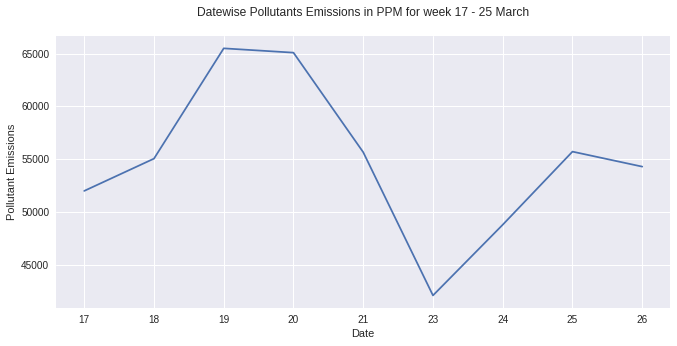

In [0]:
plt.figure()
date_wise_poll_sum.plot(figsize = (11,5))
plt.title("Datewise Pollutants Emissions in PPM for week 17 - 25 March\n")
plt.ylabel("Pollutant Emissions")
plt.xlabel("Date")
plt.xticks(np.arange(9),('17', '18', '19', '20', '21', '23', '24', '25','26'))
plt.show()

### Observation - Line Graph

**Here from the Line Graph It can be infered that Pollutants emission gets declined during weekend and then increases as the week progresses. **

** Because most of the work such as industrial and offices are closed so people dont travel during commute.**





Basic Line Graph and Area Plot show how Weekend affect the pollutants emission.

**From Monday it stays high and degrades as it progress towards weekend . It can be infer that machines, personal and public transport is big reason of pollutant emission which is degrading air quality.**

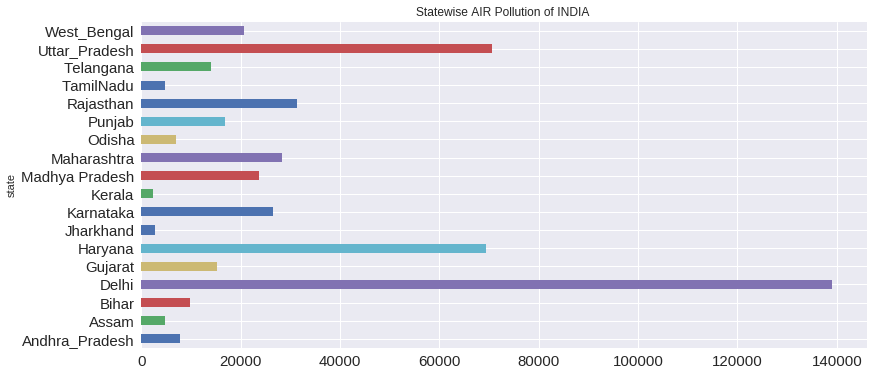

In [0]:
final_data.groupby(['state'])['pollutant_avg'].sum().plot(kind="barh",x = "Sum of Pollutants Emissions in PPM" , fontsize=15 , title= "Statewise AIR Pollution of INDIA " ,figsize = (13,6))

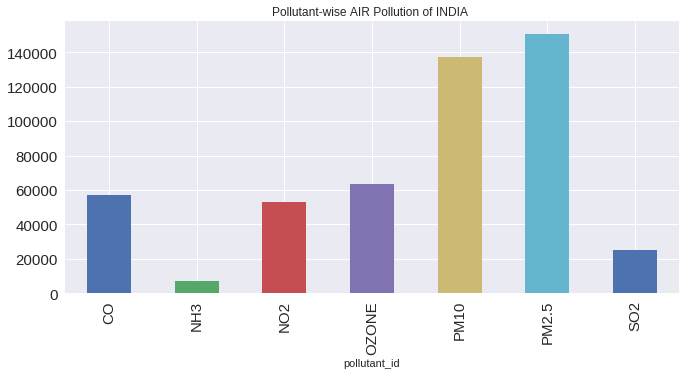

In [0]:
final_data.groupby(['pollutant_id'])['pollutant_avg'].sum().plot(kind="bar", fontsize=15 , title= "Pollutant-wise AIR Pollution of INDIA ",figsize = (11,5))

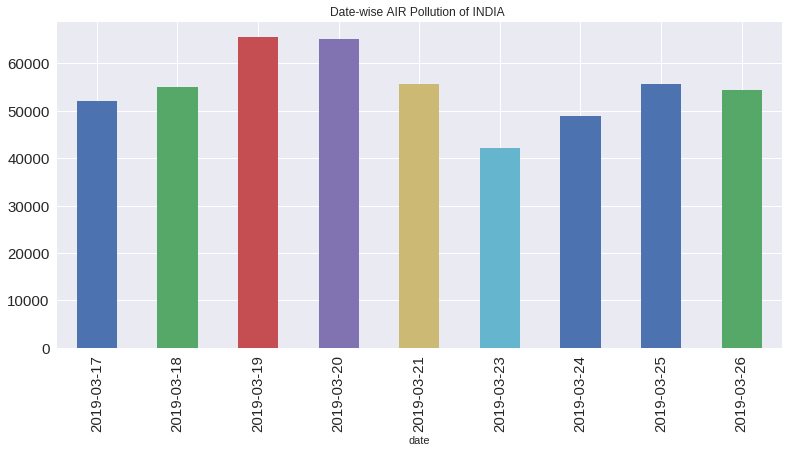

In [0]:
date_wise_poll_sum.plot(kind="bar", fontsize=15 , title= "Date-wise AIR Pollution of INDIA ",figsize = (13,6))

### Observation - Bar Graphs


1.  ** *Delhi* is the most polluted state in INDIA and twice as polluted its close neighbouring states on second *Haryana* and third *Uttar Pradesh* **
2.   ** *Maharashtra* pollutions is mostly from vehicle while *Delhi*'s one responsible for both industrial plants and vehicles **
3. ** Particulate Matter 2.5 and 10 emissions contribute the most to polluted air of India there high amount of concentration is caused by lack of enforcement of standards for car exhausts, crop burning, or dust from construction sites leads to more particulates in the air. **
4. ** Weekend Emissions are declined which indicates that commute and industrial work is major cause of pollution **

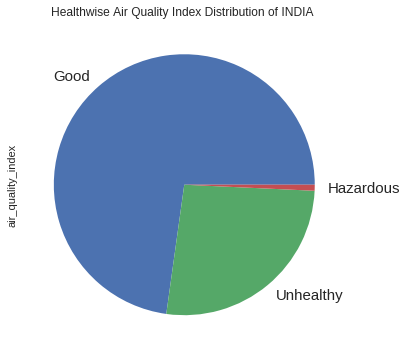

In [0]:
final_data['air_quality_index'].value_counts().plot(kind="pie", fontsize=15 , title= "Healthwise Air Quality Index Distribution of INDIA ",figsize = (13,6))

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


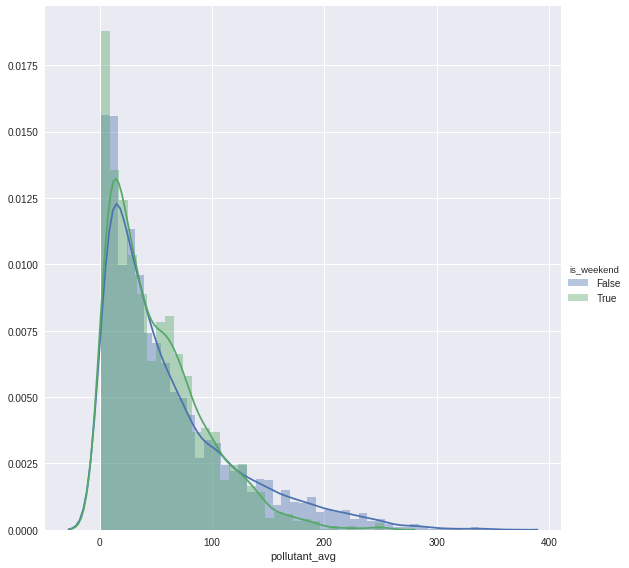

In [0]:
sns.FacetGrid(final_data, hue="is_weekend", size=8)\
   .map(sns.distplot, "pollutant_avg").add_legend();
plt.show();

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


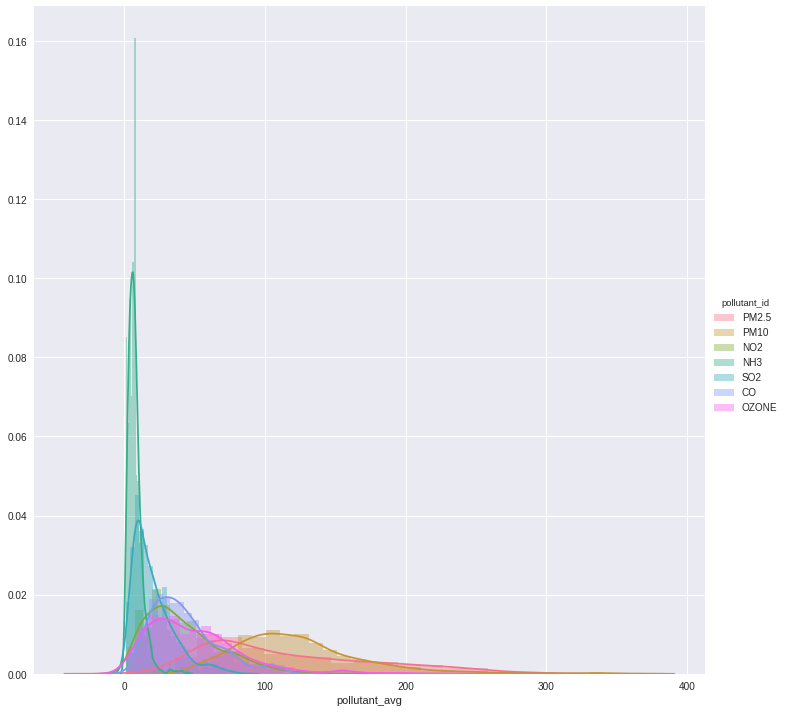

In [0]:
sns.FacetGrid(final_data, hue="pollutant_id", size=10)\
   .map(sns.distplot, "pollutant_avg").add_legend();
plt.show();

### Observation - Density Graphs


1.  ** Density distribution of each pollutant is negative skewed  **
1.  ** Density distribution of is_weekend is negative skewed  **

**Relation between City Population and Pollution**

For the purposes of this exploration, New Data Frames were created, grouping by city and pollutant_id and comparing to the mean value of the other, this data was then explored as outlined further below

It seems that business and industrial cities generates more pollution than the cities where industries are away. 


### Tentative Conclusion

Further in-depth studies and tests could be carried out to make statistically significant results.

Additional Data of **State-wise Registered Vehicles**, **City-wise or Statewise Number of Industry Registered ** and **State-wise Population **

Would prove the insights and also draw new patterns.



**Air Pollution  is dependent on Vehicles and Industries as well as Poverty.**